In [130]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

### 1.Problem statement:


### 2.Data gathering

In [131]:
df = pd.read_csv('Fish.csv')
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [132]:
df = pd.get_dummies(df, columns=['Species'],dtype=int) 

### 3.EDA

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Weight             159 non-null    float64
 1   Length1            159 non-null    float64
 2   Length2            159 non-null    float64
 3   Length3            159 non-null    float64
 4   Height             159 non-null    float64
 5   Width              159 non-null    float64
 6   Species_Bream      159 non-null    int32  
 7   Species_Parkki     159 non-null    int32  
 8   Species_Perch      159 non-null    int32  
 9   Species_Pike       159 non-null    int32  
 10  Species_Roach      159 non-null    int32  
 11  Species_Smelt      159 non-null    int32  
 12  Species_Whitefish  159 non-null    int32  
dtypes: float64(6), int32(7)
memory usage: 11.9 KB


### 4. Feature engg

In [134]:
df = df.drop(['Length2','Length3'],axis=1,)

### 5. Feature selction

In [135]:
df.corr()

,Weight,Length1,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
Weight,1.000000,0.915712,0.724345,0.886507,0.326795,-0.186034,-0.033240,0.310641,-0.261784,-0.337109,0.073625
Length1,0.915712,1.000000,0.625378,0.867050,0.216380,-0.205732,-0.037845,0.563514,-0.213250,-0.467420,0.050731
Height,0.724345,0.625378,1.000000,0.792881,0.772443,-0.000547,-0.191405,-0.101810,-0.202076,-0.491731,0.048951
Width,0.886507,0.867050,0.792881,1.000000,0.319347,-0.194147,0.144021,0.137722,-0.171465,-0.569018,0.124388
Species_Bream,0.326795,0.216380,0.772443,0.319347,1.000000,-0.144840,-0.391741,-0.183825,-0.201526,-0.165083,-0.105209
Species_Parkki,-0.186034,-0.205732,-0.000547,-0.194147,-0.144840,1.000000,-0.201021,-0.094329,-0.103413,-0.084712,-0.053988
Species_Perch,-0.033240,-0.037845,-0.191405,0.144021,-0.391741,-0.201021,1.000000,-0.255127,-0.279694,-0.229116,-0.146018
Species_Pike,0.310641,0.563514,-0.101810,0.137722,-0.183825,-0.094329,-0.255127,1.000000,-0.131247,-0.107513,-0.068519
Species_Roach,-0.261784,-0.213250,-0.202076,-0.171465,-0.201526,-0.103413,-0.279694,-0.131247,1.000000,-0.117866,-0.075117
Species_Smelt,-0.337109,-0.467420,-0.491731,-0.569018,-0.165083,-0.084712,-0.229116,-0.107513,-0.117866,1.000000,-0.061533


<Axes: >

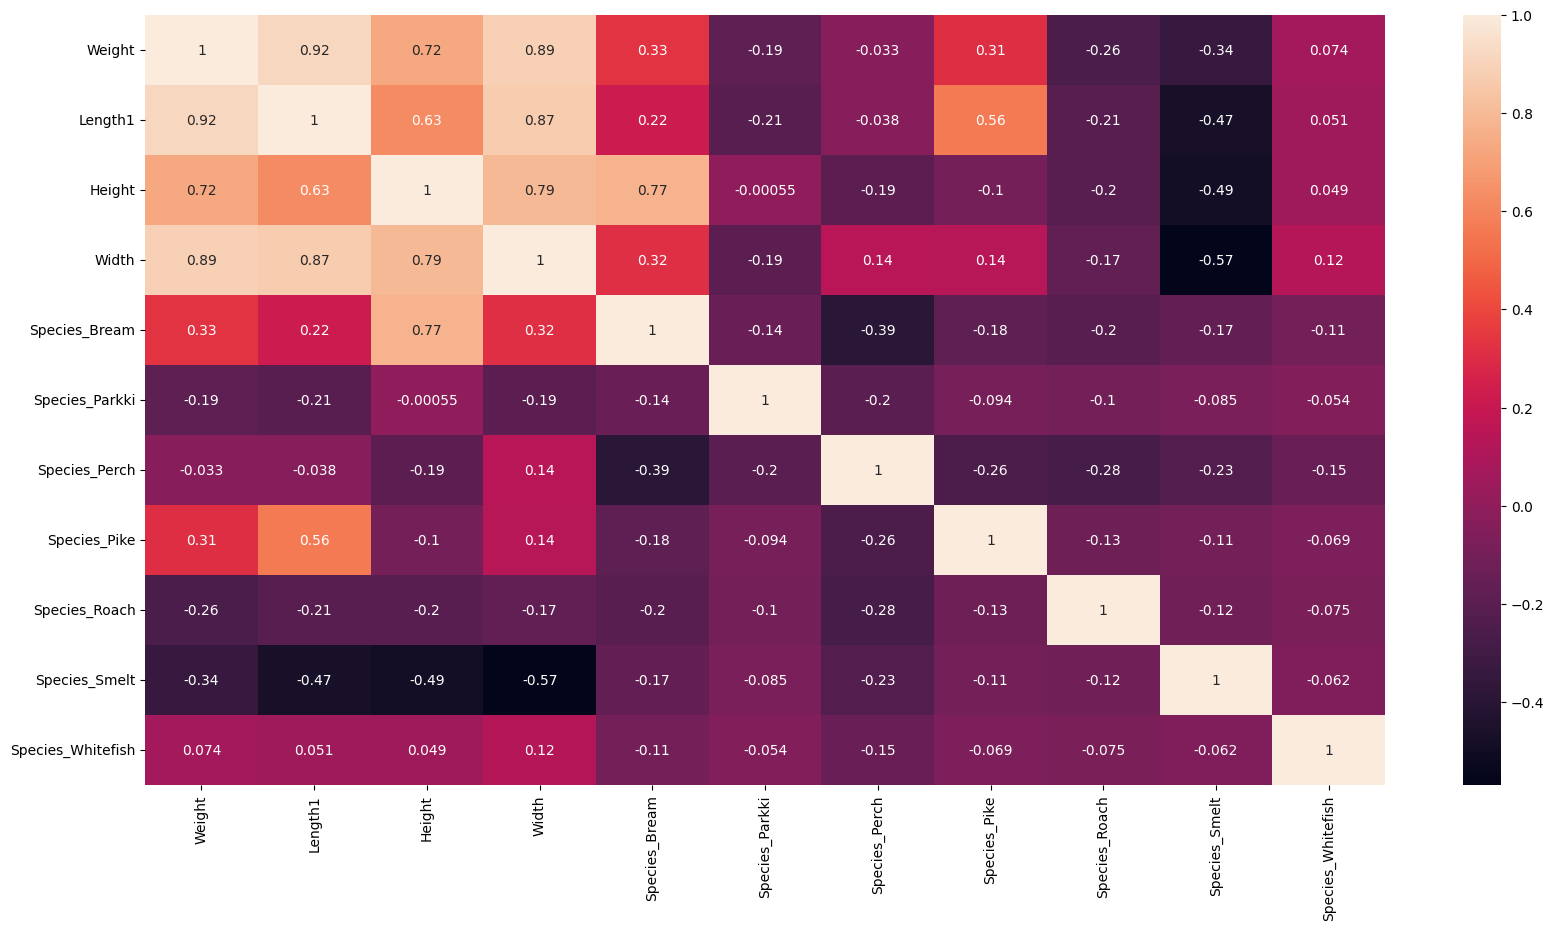

In [136]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [137]:
x = df.drop('Weight',axis=1)
y = df['Weight']

In [138]:
x

,Length1,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,23.2,11.5200,4.0200,1,0,0,0,0,0,0
1,24.0,12.4800,4.3056,1,0,0,0,0,0,0
2,23.9,12.3778,4.6961,1,0,0,0,0,0,0
3,26.3,12.7300,4.4555,1,0,0,0,0,0,0
4,26.5,12.4440,5.1340,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
154,11.5,2.0904,1.3936,0,0,0,0,0,1,0
155,11.7,2.4300,1.2690,0,0,0,0,0,1,0
156,12.1,2.2770,1.2558,0,0,0,0,0,1,0
157,13.2,2.8728,2.0672,0,0,0,0,0,1,0


In [140]:
vif_list = []
for i in range(x.shape[1]):
    vif = variance_inflation_factor(x.to_numpy(), i)
    vif_list.append(vif)

vif_values = pd.Series(vif_list, index = x.columns)
vif_values

Length1              27.038193
Height               54.308628
Width                28.647082
Species_Bream        27.830135
Species_Parkki        3.853668
Species_Perch         7.001745
Species_Pike         12.901627
Species_Roach         2.402022
Species_Smelt         1.638307
Species_Whitefish     1.862091
dtype: float64

### 6Model Building

In [141]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=11)

In [142]:
Linear_reg = LinearRegression()

In [143]:
Linear_reg.fit(x_train,y_train)

LinearRegression()

In [144]:
Linear_reg.coef_

array([  44.06076437,   12.7538543 ,  -30.41415751,  -13.49974702,
         43.12753426,   13.63113918, -337.27052841,    9.82741713,
        250.85810831,   33.32607655])

In [145]:
Linear_reg.intercept_

-732.7029085076292

### Model Evaluation

In [146]:
y_pred = Linear_reg.predict(x_test)
y_pred

array([ -19.8471456 ,  106.43631496,  540.13714002, -184.12060036,
        358.16135197,  687.19559856,  136.43332623,   94.0697007 ,
        576.36682091,  842.11682287,  720.43777758,  -49.71493672,
        -37.57692402,  215.23671561,  679.09588339,  828.51255825,
        555.200021  ,  156.27005487,  784.7126697 ,  834.16329075,
        855.95089233,  803.27525628,  -39.70532334,  -81.76516106,
        313.17770662,  224.21816477,   41.76288392,  288.54231252,
        311.02988399,   92.95886066,  321.88634573,  622.32480491])

In [147]:
resudial = y_test-y_pred
resudial

150     28.547146
158    -86.536315
9      -40.137140
73     216.120600
104    -93.161352
26      32.804401
86     -16.433326
41      15.930299
15      23.633179
121    172.883177
137   -220.437778
147     56.714937
148     47.276924
97     -70.236716
22     -59.095883
118     -8.512558
11     -55.200021
66     -16.270055
138   -217.712670
30      85.836709
122    -35.950892
116     96.724744
77     139.705323
145     88.465161
130    -13.177707
49     -63.218165
63      48.237116
51    -108.542313
52     -21.029884
83      22.041139
2       18.113654
111    217.675195
Name: Weight, dtype: float64

In [148]:
# Testing Data Evaluation

In [149]:
mse = mean_squared_error(y_test, y_pred)
mse

10089.95606456702

In [150]:
mae= mean_absolute_error(y_test,y_pred)
mae

76.13632748850665

In [151]:
rmse = np.sqrt(mse)
rmse

100.4487733353027

In [152]:
r2_value = r2_score(y_test,y_pred)
r2_value

0.9011522576207528

In [153]:
n = x_test.shape[0]
k = x_test.shape[1]
adj_r2 = 1 - ((1 - r2_value) * (n-1))/(n-k-1)
adj_r2

0.8540819041068255

In [154]:
# Training Data Evaluation

In [155]:
# Training Data Evaluation
y_pred_train = Linear_reg.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error      :", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error     :",mae)

r2_value = r2_score(y_train, y_pred_train)
print("R-Squared Value         :",r2_value)

n = x_train.shape[0]
k = x_train.shape[1]
adj_r2 = 1 - ((1 - r2_value) * (n-1))/(n-k-1)
print("Adjusted R-Squared Value:",adj_r2)

Mean Squared Error      : 8862.814381906544
Root Mean Squared Error : 94.14252164620696
Mean Absolute Error     : 67.7866768079948
R-Squared Value         : 0.9335672838048309
Adjusted R-Squared Value: 0.9278403255121439


In [158]:
row= x.iloc[55:56]
row

,Length1,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
55,23.6,8.3804,4.2476,0,0,0,0,0,0,1


In [159]:
Linear_reg.predict(row)

array([318.15243244])

In [163]:
columns_name =x.columns.tolist()
columns_name

['Length1',
 'Height',
 'Width',
 'Species_Bream',
 'Species_Parkki',
 'Species_Perch',
 'Species_Pike',
 'Species_Roach',
 'Species_Smelt',
 'Species_Whitefish']

In [166]:
Length1=23.6
Height=8.3804
Width=4.2476
Species='Whitefish'

In [167]:
Length1=23.6
Height=8.3804
Width=4.2476
Species='Species_'+ Species

In [168]:
columns_name

['Length1',
 'Height',
 'Width',
 'Species_Bream',
 'Species_Parkki',
 'Species_Perch',
 'Species_Pike',
 'Species_Roach',
 'Species_Smelt',
 'Species_Whitefish']

In [170]:
Species_index = columns_name.index(Species)
Species_index

9

In [173]:
test_array = np.zeros([1,x.shape[1]])
test_array

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [174]:
test_array[0,0] = Length1
test_array[0,1] = Height
test_array[0,2] = Width
test_array[0,Species_index] = 1

In [177]:
import pickle
import json

In [178]:
with open ('fish_model.pkl', 'wb') as f:
    pickle.dump(Linear_reg,f)

In [179]:
project_data = {"Column Names" : columns_name}

with open('proj_data.json','w') as f:
    json.dump(project_data, f)